# Stable states pattern of the model
## Synchronous updating

We performed the stable states analysis using the synchronous updating methods for the model pairs that are larger and where asynchronous updating can lead to large number of attractors.  
     
To evaluate the consistency and robustness of the merged model, the attractors patterns of both the individual models and merged models are clustered based on the hamming distance between them.


In [1]:
model1name = "Palma2021"
model2name = "Ikonomi2020"

In [3]:
pip install adjustText

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import biolqm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches
import matplotlib.colors as colors
from scipy.stats import pearsonr
from adjustText import adjust_text

This notebook has been executed using the docker image `colomoto/colomoto-docker:2024-03-01`

In [3]:
merged_and_name = "persistent/Models/merged_and_" + model1name + "_" + model2name
merged_inhibitor_wins_name = "persistent/Models/merged_inhibitor_wins_" + model1name + "_" + model2name
merged_or_name = "persistent/Models/merged_or_" + model1name + "_" + model2name

# load the network
merged_and = biolqm.load(merged_and_name + ".sbml")
merged_inhibitor_wins = biolqm.load(merged_inhibitor_wins_name + ".sbml")
merged_or = biolqm.load(merged_or_name + ".sbml")

In [6]:
# get the synchronous attractor states
attr_and = pd.DataFrame(biolqm.fixpoints(merged_and))
attr_inhibitor_wins = pd.DataFrame(biolqm.fixpoints(merged_inhibitor_wins))
attr_or = pd.DataFrame(biolqm.fixpoints(merged_or))
attr_and.index = ['S' + str(i+1) for i in range(len(attr_and))]
attr_inhibitor_wins.index = ['S' + str(i+1) for i in range(len(attr_inhibitor_wins))]
attr_or.index = ['S' + str(i+1) for i in range(len(attr_or))]

# save the attractor states
attr_and.to_csv('persistent/SimulationResults/' + "attr_merged_and_" + model1name + "_" + model2name + '.csv')
attr_inhibitor_wins.to_csv('persistent/SimulationResults/' + "attr_merged_inhibitor_wins_" + model1name + "_" + model2name + '.csv')
attr_or.to_csv('persistent/SimulationResults/' + "attr_merged_or_" + model1name + "_" + model2name + '.csv')

In [7]:
# Define the order of columns for better visualization
column_order_1 = ['PROLIFERATION','STAT5A','SOX4','MAPK1','HOXA9','MEIS1','BCL2','FBXW7','NPM1','DNMT3A','CEBPA','ETV6','FLT3','MYC', 'AKT1', 'CCND1','TP53','CDKN2A','GSK3B','APOPTOSIS']
column_order_2 = ['MYC', 'AKT1', 'CCND1','TP53','CDKN2A','GSK3B','APOPTOSIS','S_PHASE','CCNE1','E2F1','ROS1','ANTI_APOPTOTIC_PROTEINS','MDM2','CTNNB1','MEFV','NRAS','MITOCHONDRIA','MTOR','EXTERNAL_CYCLING','PIK3CA','BMI1','EXTERNAL_QUIESCENCE','CDKN1B','FOXO3','ATM','AUTOPHAGY','ETS1','SENESCENCE','CYCS','PRO_APOPTOTIC_PROTEINS','CDKN2D','RB1','GFI1','CDKN1A','TSC1']
column_order_merged = ['PROLIFERATION','STAT5A','SOX4','MAPK1','HOXA9','MEIS1','BCL2','FBXW7','NPM1','DNMT3A','CEBPA','ETV6','FLT3','MYC', 'AKT1', 'CCND1','TP53','CDKN2A','GSK3B','APOPTOSIS', 'S_PHASE','CCNE1','E2F1','ROS1','ANTI_APOPTOTIC_PROTEINS','MDM2','CTNNB1','MEFV','NRAS','MITOCHONDRIA','MTOR','EXTERNAL_CYCLING','PIK3CA','BMI1','EXTERNAL_QUIESCENCE','CDKN1B','FOXO3','ATM','AUTOPHAGY','ETS1','SENESCENCE','CYCS','PRO_APOPTOTIC_PROTEINS','CDKN2D','RB1','GFI1','CDKN1A','TSC1']

# Model1 results
df1 = pd.read_csv("persistent/SimulationResults/attr_" + model1name + ".csv", index_col = 0)
df1.index = df1.index.str.replace('S', model1name[0]) #using 'A' for all stable states from the first model
df1 = df1[column_order_1]

# Model2 results
df2 = pd.read_csv("persistent/SimulationResults/attr_" + model2name + ".csv", index_col = 0)
df2.index = df2.index.str.replace('S', model2name[0]) #using 'B' for all stable states from the second model
df2 = df2[column_order_2]

# Merged results
df_and = pd.read_csv("persistent/SimulationResults/attr_merged_and_" + model1name + "_" + model2name + '.csv', index_col = 0)
df_and.index = df_and.index.str.replace('S', 'M') #using 'M' for all stable states from the merged model
df_and = df_and[column_order_merged]
df_and = pd.concat([df_and, df1, df2])

df_inhibitor_wins = pd.read_csv("persistent/SimulationResults/attr_merged_inhibitor_wins_" + model1name + "_" + model2name + '.csv', index_col = 0)
df_inhibitor_wins.index = df_inhibitor_wins.index.str.replace('S', 'M')
df_inhibitor_wins = df_inhibitor_wins[column_order_merged]
df_inhibitor_wins = pd.concat([df_inhibitor_wins, df1, df2])

df_or = pd.read_csv("persistent/SimulationResults/attr_merged_or_" + model1name + "_" + model2name + '.csv', index_col = 0)
df_or.index = df_or.index.str.replace('S', 'M')
df_or = df_or[column_order_merged]
df_or = pd.concat([df_or, df1, df2])

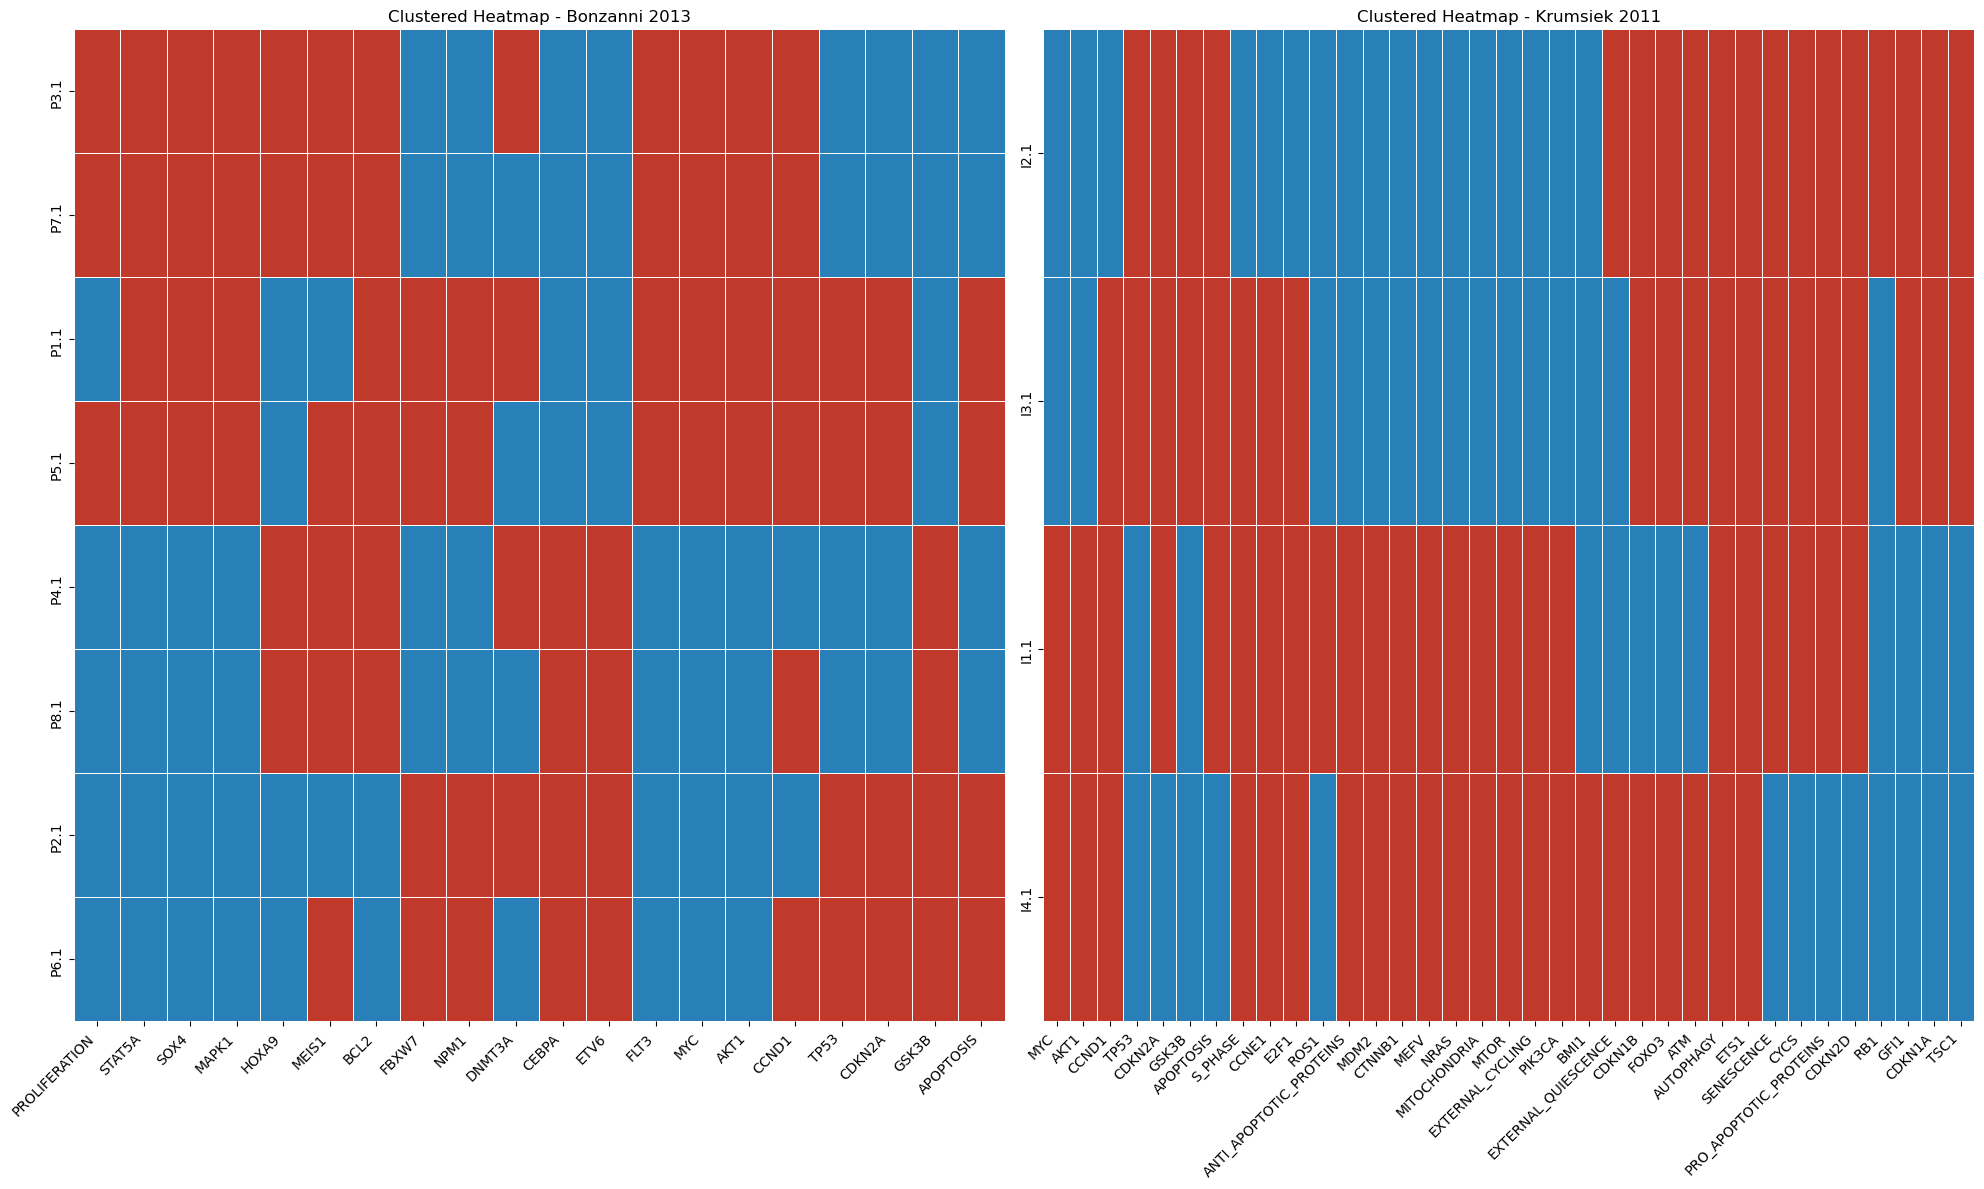

In [8]:
# Visualize
cmap = ListedColormap(['#c0392b', '#2980b9'])

g1 = sns.clustermap(df1, method='ward', metric='euclidean', cmap=cmap, linewidths=0.5, linecolor='white', figsize=(8, 8), cbar=False, col_cluster=False)
plt.close(g1.fig)  
g2 = sns.clustermap(df2, method='ward', metric='euclidean', cmap=cmap, linewidths=0.5, linecolor='white', figsize=(8, 8), cbar=False, col_cluster=False)
plt.close(g2.fig) 

# Create a new figure to hold both clustermaps
fig = plt.figure(figsize=(20,12))
gs = GridSpec(1, 2, figure=fig)

# Draw the first clustermap in the left subplot
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(g1.data2d, ax=ax1, cbar=False, cmap=cmap, linewidths=0.5, linecolor='white')
ax1.set_title('Clustered Heatmap - Bonzanni 2013')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')

# Draw the second clustermap in the right subplot
ax2 = fig.add_subplot(gs[0, 1])
sns.heatmap(g2.data2d, ax=ax2, cbar=False, cmap=cmap, linewidths=0.5, linecolor='white')
ax2.set_title('Clustered Heatmap - Krumsiek 2011')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')

# Show the combined figure
plt.tight_layout()
plt.show()

/tmp/ipykernel_3502/985324493.py:56: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle((col_pos, row_pos), 1, 1, fill=True, color='lightgrey', edgecolor='black', linewidth=0.5)


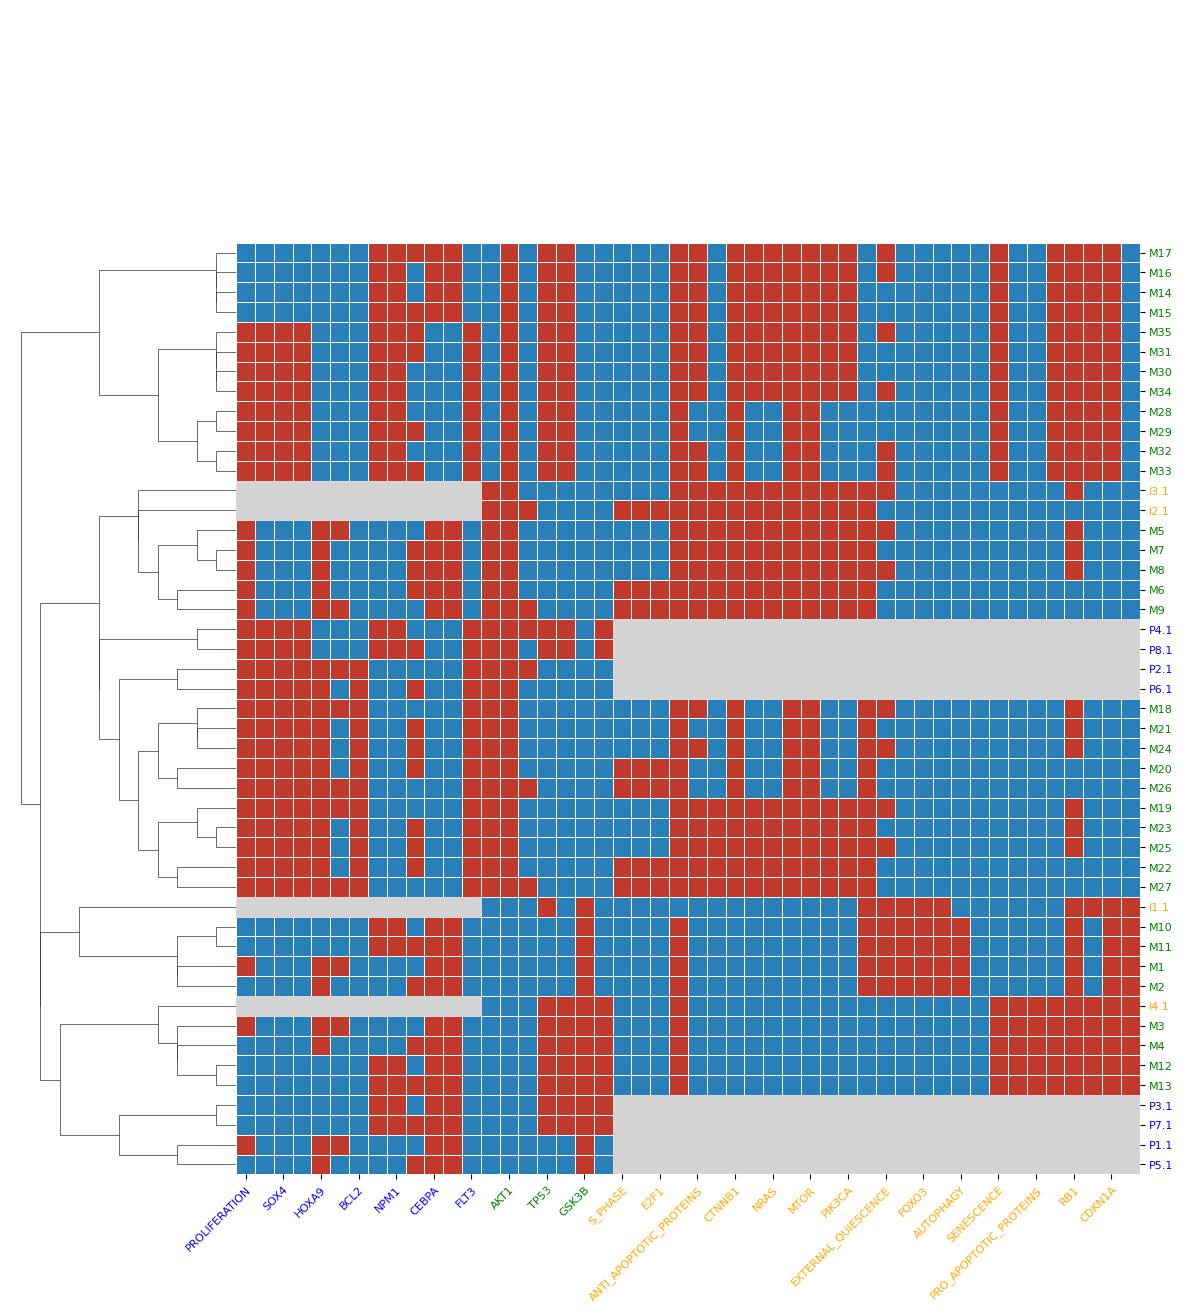

In [12]:
def heatmap(df, figsize=(12, 14)):
    # Create a custom colormap: blue for 0, red for 1
    cmap = ListedColormap(['#2980b9', '#c0392b'])
    bounds = [-0.1, 0.5, 1.1]  # Boundaries to separate colors
    norm = colors.BoundaryNorm(bounds, cmap.N)

    # Fill NaN values with 0 for clustering
    df_filled = df.fillna(0)
    
    # Mask NaN values for clustering
    mask = df.isna()

    # Create the clustermap
    g = sns.clustermap(df_filled, method='single', metric='hamming', cmap=cmap, norm=norm,
                       linewidths=0.5, linecolor='white', figsize=figsize, cbar=False, col_cluster=False)
    g.ax_heatmap.tick_params(axis='y', labelsize=8)
    g.ax_heatmap.tick_params(axis='x', labelsize=8)
    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")  # Rotate x-tick labels
    g.cax.set_visible(False)

    # Determine the color based on the label text
    def get_ylabel_color(label):
        if label.startswith(model1name[0]):
            return 'blue'
        elif label.startswith(model2name[0]):
            return 'orange'
        elif label.startswith('M'):
            return 'green'
        else:
            return 'black'  # Default color
    
    def get_xlabel_color(label):
        if label in set(column_order_merged) - set(column_order_1):
            return 'orange'
        elif label in set(column_order_merged) - set(column_order_2):
            return 'blue'
        else:
            return 'green'
            
    # Set the color of labels based on their text
    for label in g.ax_heatmap.get_yticklabels():
        label.set_color(get_ylabel_color(label.get_text()))
    for label in g.ax_heatmap.get_xticklabels():
        label.set_color(get_xlabel_color(label.get_text()))

    # Add grey patches on NA grid cells based on clustered positions
    for (i, j), val in np.ndenumerate(df.values):
        if pd.isna(val):
            # Get the correct row and column indices in the clustered heatmap
            row_index = df.index[i]
            col_index = df.columns[j]
            # Find the positions in the clustered heatmap
            row_pos = np.where(g.data2d.index == row_index)[0][0]
            col_pos = np.where(g.data2d.columns == col_index)[0][0]
            # Create a rectangle patch with light grey fill
            rect = patches.Rectangle((col_pos, row_pos), 1, 1, fill=True, color='lightgrey', edgecolor='black', linewidth=0.5)
            g.ax_heatmap.add_patch(rect)
    
    plt.show()

heatmap(df_inhibitor_wins)

/tmp/ipykernel_3502/985324493.py:56: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle((col_pos, row_pos), 1, 1, fill=True, color='lightgrey', edgecolor='black', linewidth=0.5)


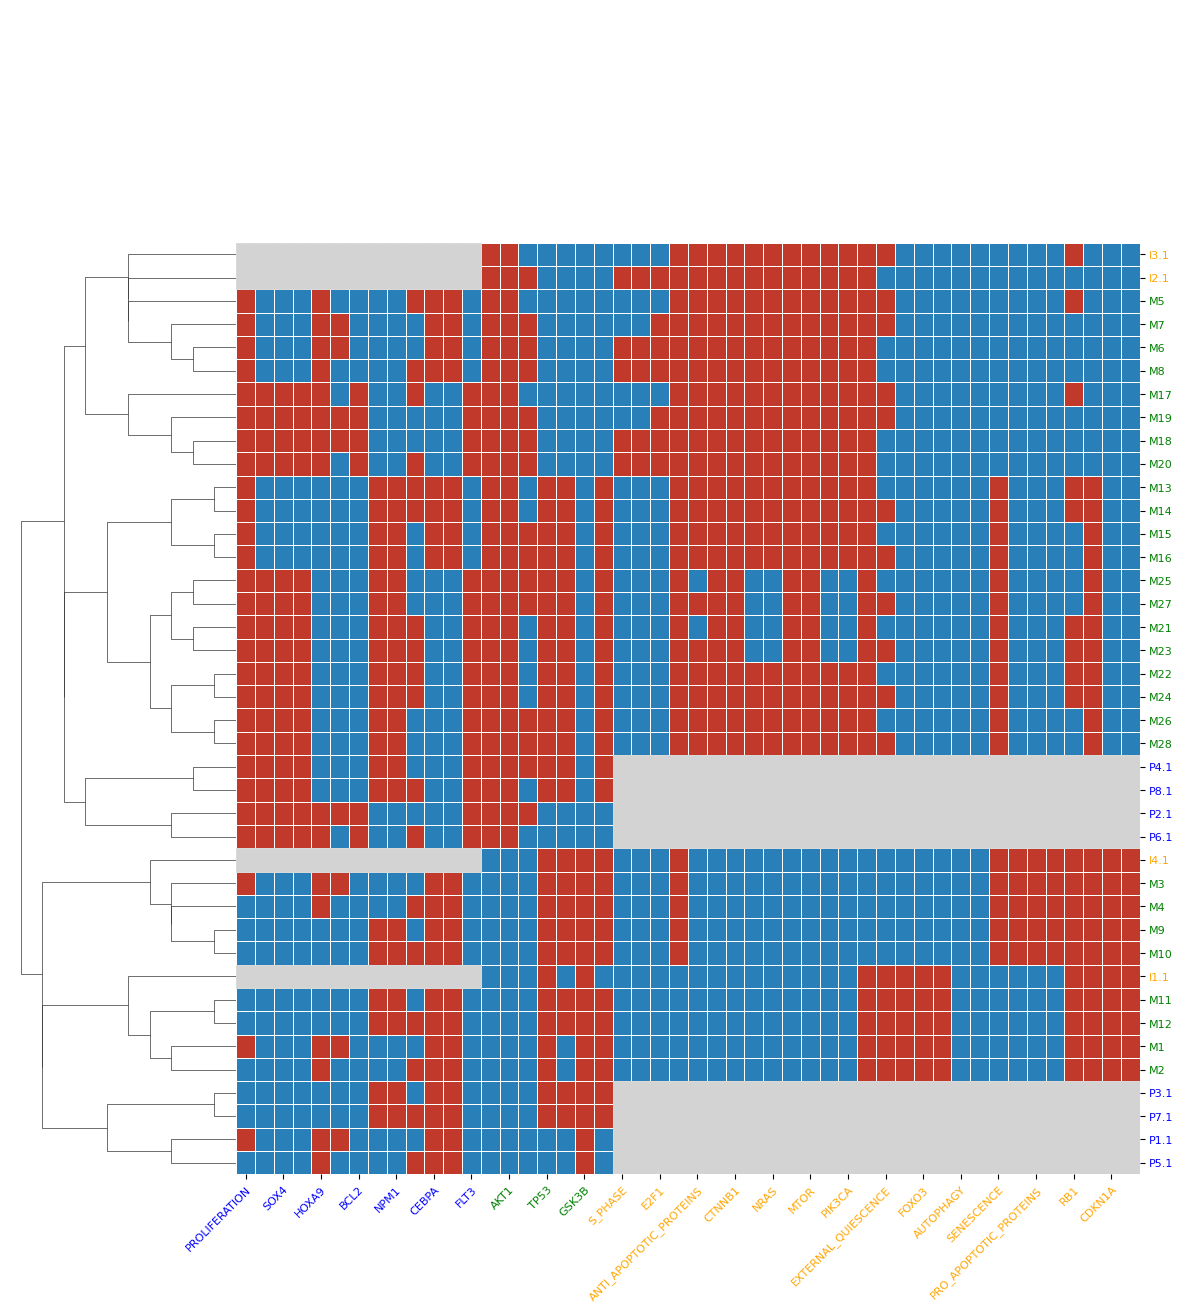

In [13]:
heatmap(df_or)

/tmp/ipykernel_3502/985324493.py:56: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle((col_pos, row_pos), 1, 1, fill=True, color='lightgrey', edgecolor='black', linewidth=0.5)


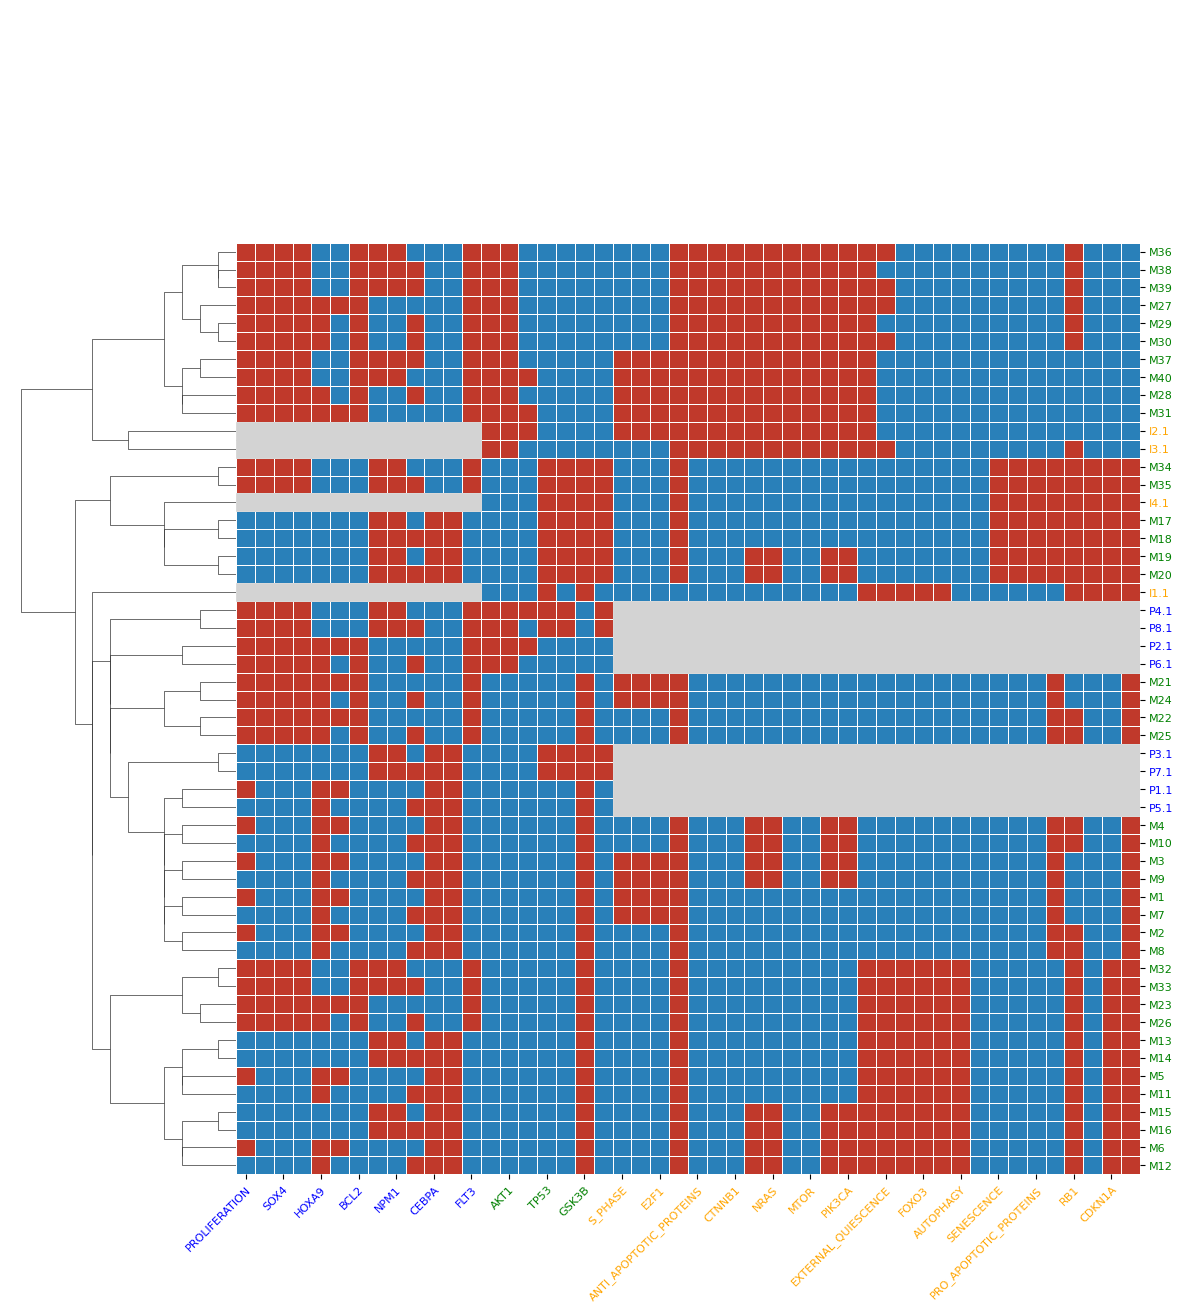

In [15]:
heatmap(df_and)